<a href="https://colab.research.google.com/github/Shanthan0/Python/blob/main/Multicollinearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Instructions

---

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Multiple linear regression - Introduction
 2. Multicollinearity
 
 

---

### Problem Statement

Implement multiple linear regression to create a predictive model capable of predicting the profits earned by startup companies. The dataset contains data about 50 startups and the amount of money they spend on research and development, administration and marketing. Also, find out if there is multicollinearity in the dataset.






---

### List of Activities
 
**Activity 1:** Analysing the Dataset
 
**Activity 2:** Data Manipulation
 
**Activity 3:** Train-Test Split
 
**Activity 4:** Model Training and Prediction using `sklearn`
 
**Activity 5:** Model Training using `statsmodels.api` 
 


---

 
#### Activity 1:  Analysing the Dataset
 
- Create a Pandas DataFrame for **Startups** dataset using the below link. This dataset contains profits earned by 50 startups and their several expenditure values.
 
 
 
   **Dataset Link:** https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/50_Startups.csv
 
- Print the first five rows of the dataset. Check for null values and treat them accordingly.

In [ ]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 
# Load the dataset

df = pd.read_csv('https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/whitehat-ds-datasets/50_Startups.csv')
# Print first five rows using head() function
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# Check if there are any null values. If any column has null values, treat them accordingly
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

---

#### Activity 2: Data Manipulation

The dataset contains a column `State` that is categorical. However for linear regression, we need all numerical variables. So to convert the categorical data to a numerical data, 
- Use `unique()` function to get the unique categories of the `State` column.
- Replace the unique categories with intergers starting from `0`, `1`, `2`,...


In [ ]:
# Display the number of occurrences of each label in the 'State' column.
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [ ]:
# Create a list of unique categories using 'unique()' function and print them
uniq_cat = list(df['State'].unique())
uniq_cat

['New York', 'California', 'Florida']

In [ ]:
# Replace the unique non-numeric categories in 'State' column with numeric values 
df.replace(to_replace = {'New York':0,'California':1,'Florida':2},inplace = True)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [ ]:
# Display the number of occurrences of each label in the 'State' column again.
print(df['State'].value_counts())
# Print the datatype of the column
print(df['State'].dtype)

1    17
0    17
2    16
Name: State, dtype: int64
int64


In [ ]:
# Print the information of the DataFrame to verify the column's datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int64  
 4   Profit           50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 2.1 KB


---

#### Activity 3: Train-Test Split
 
We need to predict the value of `Profit` variable, using other variables. Thus, `Profit` is the target or dependent variable and other columns except `Profit` are the features or the independent variables.
 
Split the dataset into training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

In [ ]:
# Split the DataFrame into the training and test sets.
from sklearn.model_selection import train_test_split
x  = df.iloc[:,:-1]
y = df['Profit']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

---

#### Activity 4: Model Training and Prediction using `sklearn`

Implement multiple linear regression using `sklearn` module by creating an object of the `LinearRegression` class and calling the `fit()` function.

**Note:** Reshaping the target variable array into a 2D array is not mandatory in multiple linear regression. You can skip that.

In [ ]:
# Build linear regression model using sklearn module
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
# Print the value of the intercept 
print('Intercet:',lr.intercept_)

# Print the names of the features along with the values of their corresponding coefficients.
for i in range(len(x.columns)):
  print(f'{x.columns[i]}: {lr.coef_[i]}')

Intercet: 56350.35199301148
R&D Spend: 0.8052872664162146
Administration: -0.0909759187326755
Marketing Spend: 0.027619562917949494
State: 847.9499576649133


Predict the values for the test set by calling the `predict()` function on the LinearRegression object. 

In [ ]:
# Predict the target variable values for test set
y_test_pred = lr.predict(x_test)

---

#### Activity 5: Model Training using `statsmodels.api`

Perform the following tasks:
- Implement multiple linear regression using `statsmodels.api` module and find the values of all the regression coefficients using this module.
-Print the statistical summary of the regression model.
- If the summary indicates the presence of multicollinearity, create a heatmap of a correlation DataFrame to identify which independent variables are highly correlated with each other.

In [ ]:
# Build a linear regression model using the 'statsmodels.api' module.
import statsmodels.api as sm


# Add a constant to feature variables 
x_train_sm = sm.add_constant(x_train)

# Fit the regression line using 'OLS'
sm_lr = sm.OLS(y_train,x_train_sm).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
print(sm_lr.params)

const              56350.351993
R&D Spend              0.805287
Administration        -0.090976
Marketing Spend        0.027620
State                847.949958
dtype: float64


In [ ]:
# Print statistical summary of the model 
print(sm_lr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     146.0
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.31e-19
Time:                        15:57:56   Log-Likelihood:                -368.46
No. Observations:                  35   AIC:                             746.9
Df Residuals:                      30   BIC:                             754.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.635e+04   9659.130     

**Q:** What is the $R^2$ (R-squared) value for this model?

**A:** 0.951

**Q:** Does the summary table indicates the presence of multicollinearity?

**A:** Yes

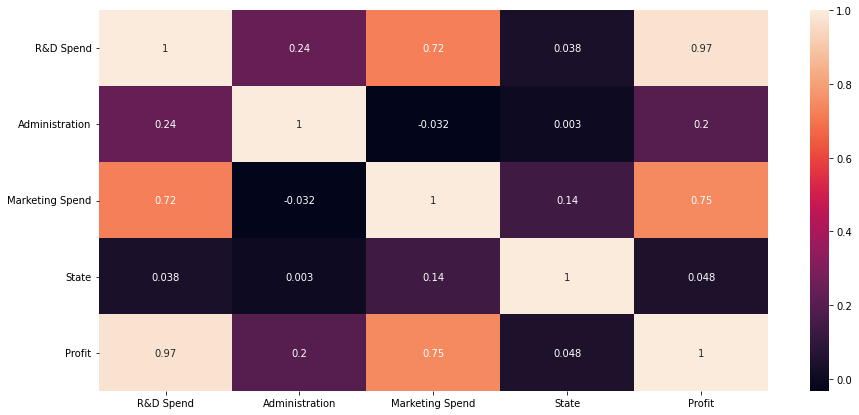

In [ ]:
# If there is multicollinearity, create a heatmap of a correlation DataFrame of the Startup dataset.
# If no, skip this part
plt.figure(figsize = (15,7))
sns.heatmap(df.corr(),annot = True)
plt.show()

**Q:** Which independent variables are strongly correlated with each other?

**A:** Profit and R&D Spend are strongly correlated.

---